# **Series Temporais**

**Aula 02**

**prof: Sergio Assuncao Monteiro, DSc**

lattes: http://lattes.cnpq.br/9489191035734025

#**Métodos Autorregressivos de Médias Móveis (ARMA)**

In [82]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.api import qqplot

In [83]:
df = sm.datasets.sunspots.load_pandas().data[['SUNACTIVITY']]
df.index = pd.Index(sm.tsa.datetools.dates_from_range("1700", "2008"))
print(sm.datasets.sunspots.NOTE)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



In [84]:
with pd.option_context('display.max_rows',10):
  print(df)

            SUNACTIVITY
1700-12-31          5.0
1701-12-31         11.0
1702-12-31         16.0
1703-12-31         23.0
1704-12-31         36.0
...                 ...
2004-12-31         40.4
2005-12-31         29.8
2006-12-31         15.2
2007-12-31          7.5
2008-12-31          2.9

[309 rows x 1 columns]


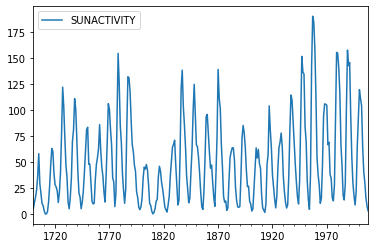

In [85]:
df.plot()

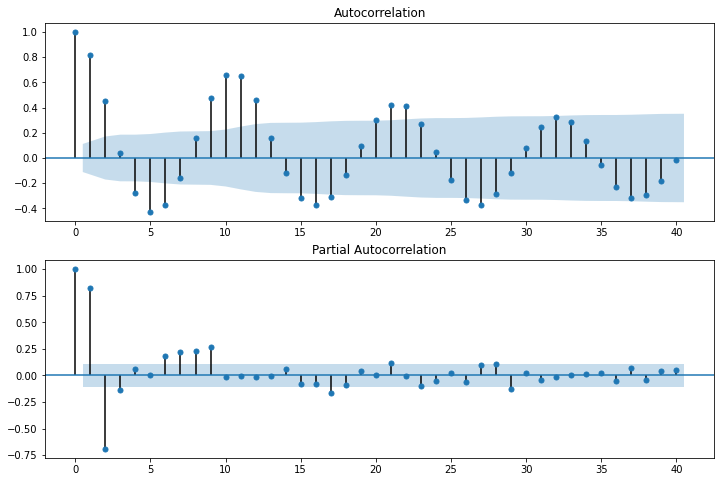

In [86]:
qtd_defasagens = 40
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.values.squeeze(), 
                               lags=qtd_defasagens, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df, 
                                lags=qtd_defasagens, ax=ax2)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency A-DEC will be used.

/usr/local/lib/python3.7/dist-packages/stats

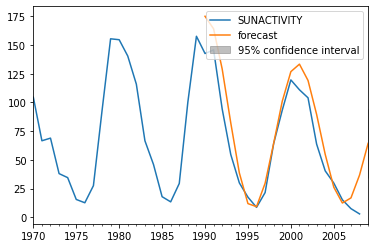

In [87]:
p = 3
q = 2
res = sm.tsa.ARMA(df, (p, q)).fit()
fig, ax = plt.subplots()
ax = df.loc['1970':].plot(ax=ax)
fig = res.plot_predict('1990', '2009', 
                       dynamic=True, 
                       ax=ax,
                       plot_insample=False)
plt.show()

# **Modelos Autorregressivos Integrados de Médias Móveis – ARIMA(p,d,q)**

In [88]:
with pd.option_context('display.max_rows',6):
  print(df)

            SUNACTIVITY
1700-12-31          5.0
1701-12-31         11.0
1702-12-31         16.0
...                 ...
2006-12-31         15.2
2007-12-31          7.5
2008-12-31          2.9

[309 rows x 1 columns]


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 309 entries, 1700-12-31 to 2008-12-31
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUNACTIVITY  309 non-null    float64
dtypes: float64(1)
memory usage: 12.9 KB


**PDARIMA**

In [90]:
import statsmodels.api as sm

In [91]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


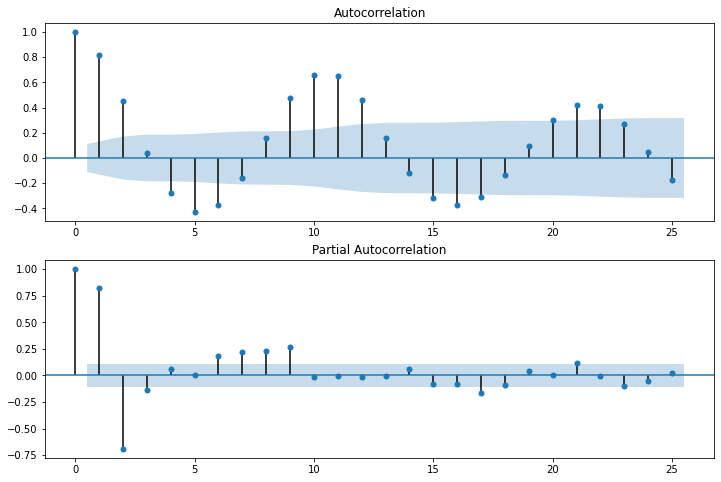

In [92]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df, ax=ax2)

In [93]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['SUNACTIVITY'], 
                          trace=True,
                          suppress_warnings=True)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2578.271, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2835.116, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2730.690, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2743.278, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2833.116, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.86 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2611.999, Time=0.63 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2575.206, Time=1.43 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2597.162, Time=1.34 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=4.02 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=2577.122, Time=3.50 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2574.924, Time=1.46 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.07 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=2576.690, Time=1.46 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, T

In [94]:
from statsmodels.tsa.arima.model import ARIMA
modelo = ARIMA(df['SUNACTIVITY'], order=(2,1,3))
modelo_fit = modelo.fit()
print(modelo_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency A-DEC will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency A-DEC will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency A-DEC will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -1280.477
Date:                Tue, 01 Nov 2022   AIC                           2572.954
Time:                        20:55:43   BIC                           2595.335
Sample:                    12-31-1700   HQIC                          2581.903
                         - 12-31-2008                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6145      0.026     62.096      0.000       1.564       1.665
ar.L2         -0.9354      0.022    -41.820      0.000      -0.979      -0.892
ma.L1         -1.4392      0.059    -24.590      0.0

In [95]:
modelo_fit.predict()

1700-12-31     0.000000
1701-12-31     5.001522
1702-12-31    14.216050
1703-12-31    17.941763
1704-12-31    25.179053
                ...    
2004-12-31    32.868810
2005-12-31    23.051819
2006-12-31    25.966227
2007-12-31    21.072536
2008-12-31    24.232068
Freq: A-DEC, Name: predicted_mean, Length: 309, dtype: float64

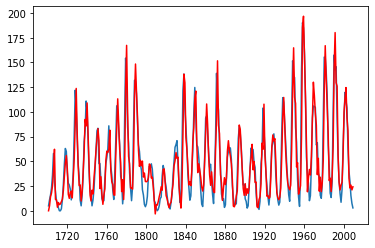

In [96]:
inicio=0
fim=len(df)-1
predicoes=modelo_fit.predict(start=0,
                         end=fim).rename('Predições ARIMA')

plt.plot(df)
plt.plot(predicoes,color='red')

In [97]:
predicoes=modelo_fit.predict(fim+1)
print(predicoes)

2009-12-31    25.823885
Freq: A-DEC, dtype: float64


# **Averiguação de Qualidade**

**Dados Reais vs Preditos**

In [ ]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
n=100
periodo = np.arange(n)
#seguindo a distribuição normal
y_teste = np.random.standard_normal(n) 
#perturbação de y_teste
y_pred = y_teste +0.5*np.random.standard_normal(n)

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(periodo, y_pred)
plt.plot(periodo, y_teste, 'ro--')
plt.title('Real vs Predição')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

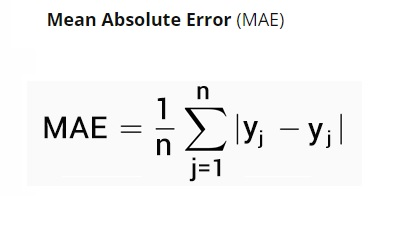

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_teste, y_pred))  

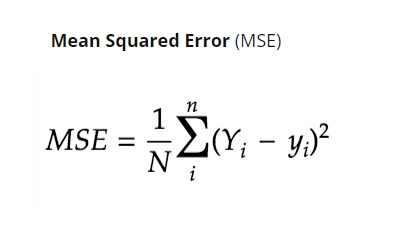

In [ ]:
print('MSE:', metrics.mean_squared_error(y_teste, y_pred))  

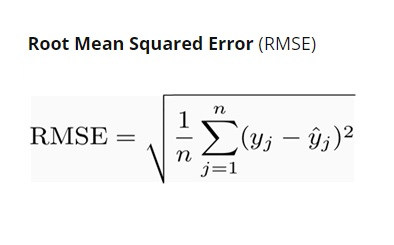

In [ ]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred)))

# **Exercício para próxima aula: acrescente a aplicação do modelo ARIMA e do método RMSE para o código abaixo.**

**Instalação dos pacotes**

In [98]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [99]:
pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Aquisição de Dados**

In [100]:
import pandas as pd
import yfinance as yf 

In [101]:
df = yf.download('PETR4.SA', 
                 start='2019-11-01', 
                 end='2020-06-01',
                 group_by="ticker"); 

[*********************100%***********************]  1 of 1 completed


In [102]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-01,30.590000,31.230000,29.840000,30.430000,16.185856,101210200
2019-11-04,30.889999,31.219999,29.959999,30.360001,16.148621,81023400
2019-11-05,30.410000,30.600000,29.580000,29.650000,15.770969,92980900
2019-11-06,30.049999,30.700001,28.100000,29.709999,15.802882,154003100
2019-11-07,30.000000,31.070000,29.540001,30.900000,16.435848,96329000


**Visualização dos Dados**

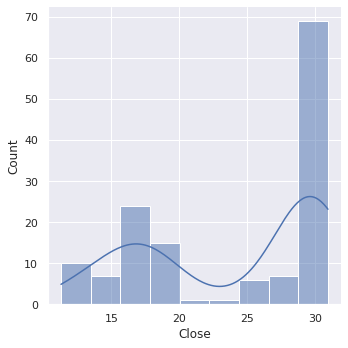

In [103]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.displot(df['Close'].dropna(),kde=True)

In [104]:
import plotly.offline as py
import plotly.graph_objs as go
dados = [go.Scatter(x=df.index, y=df['Close'])]
layout = go.Layout(title='Histórico dos Preços da Ação',
                   yaxis={'title':'Preços'},
                   xaxis={'title': 'Período'})
fig = go.Figure(data=dados, layout=layout)
py.iplot(fig)

**Agora, é sua vez de aplicar o modelo ARIMA. Bons Estudos!**